In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
def plotcompare(data_dict,metric='Accuracy'):
    # Marker styles for each metric
    markers = {'SelectMicro': 'o', 'Lasso': 's', 'SelectMicrro_Lasso': '^'}
    labels = {'SelectMicro': 'SelectMicro', 'Lasso': 'Lasso', 'SelectMicrro_Lasso': 'SelectMicrro_Lasso'}
    
    # Plot each element in the dataset
    plt.figure(figsize=(8, 6))
    if metric=='AUC':
        j=2
    elif metric == 'F':
        j=3
    else:
        j=1

    # Create a list to collect the line handles for the legend
    line_handles = []

    
    # Iterate over the outer dictionary (keys are 'Smocky_Burn', 'Smocky_urban', etc.)
    for region, metrics in data_dict.items():
        # Collect all points for the region
        x_vals = []
        y_vals = []
        
        # Collect points for each metric
        for method, values in metrics.items():
            x_vals.append(values[0])  # First element (x-coordinate)
            y_vals.append(values[j])  # Second element (y-coordinate)
            
            # Plot the point for each metric with different markers based on the metric name
            plt.scatter(values[0], values[j], marker=markers[method], color='black')
    
       # Plot the line connecting the points for the region and store the line handle for the legend
        line_handle, = plt.plot(x_vals, y_vals, label=f"{region}")
        line_handles.append(line_handle)
    
    # Create custom legend handles for the markers with black color
    legend_handles = [Line2D([0], [0], marker=markers[method], color='black', markerfacecolor='black', markersize=8, label=labels[method]) for method in markers]
    
    # Set labels and title
    plt.xlabel('Number of Features Selected')
    plt.ylabel(metric)
    plt.title(f'{metric} of each Feature Selection Method in each dataset')
    
    # Display the legend with both line handles and marker handles
    plt.legend(handles=line_handles + legend_handles)
    
    
    # Show the plot
    #plt.grid(True)
    plt.show()

In [3]:
summary_data_RF = {'Smocky_Burn':{'SelectMicro':[56,0.89697,0.977778,0.933196],
                              'Lasso':[14,0.913636,1,0.943722],
                              'SelectMicrro_Lasso':[15,	0.930303,1,0.955487]},
                'Smocky_urban':{'SelectMicro':[29,0.627273,	0.658413,0.670513 ],
                              'Lasso':[11,0.712121,	0.761905,0.777187],
                              'SelectMicrro_Lasso':[14,	0.748485,0.762063,0.807396]},
                'Smocky_Annual':{'SelectMicro':[19,0.760606,0.81625,0.833241],
                              'Lasso':[7,0.780303,0.813393,0.841429],
                              'SelectMicrro_Lasso':[12,	0.780303,0.861071,0.840219]},
                   'Moss':{'SelectMicro':[11,0.700000,0.900,0.653333],
                              'Lasso':[11,0.833333,0.925,0.826667 ],
                              'SelectMicrro_Lasso':[4,	0.700000,0.900,0.653333]},
               }

In [4]:
# Convert to DataFrame
for datatype, subset in summary_data_RF.items():
    df = pd.DataFrame(subset).T
    df.columns=['Number','ACC','AUC','F1']
    print(datatype)
    print(df)

Smocky_Burn
                    Number       ACC       AUC        F1
SelectMicro           56.0  0.896970  0.977778  0.933196
Lasso                 14.0  0.913636  1.000000  0.943722
SelectMicrro_Lasso    15.0  0.930303  1.000000  0.955487
Smocky_urban
                    Number       ACC       AUC        F1
SelectMicro           29.0  0.627273  0.658413  0.670513
Lasso                 11.0  0.712121  0.761905  0.777187
SelectMicrro_Lasso    14.0  0.748485  0.762063  0.807396
Smocky_Annual
                    Number       ACC       AUC        F1
SelectMicro           19.0  0.760606  0.816250  0.833241
Lasso                  7.0  0.780303  0.813393  0.841429
SelectMicrro_Lasso    12.0  0.780303  0.861071  0.840219
Moss
                    Number       ACC    AUC        F1
SelectMicro           11.0  0.700000  0.900  0.653333
Lasso                 11.0  0.833333  0.925  0.826667
SelectMicrro_Lasso     4.0  0.700000  0.900  0.653333


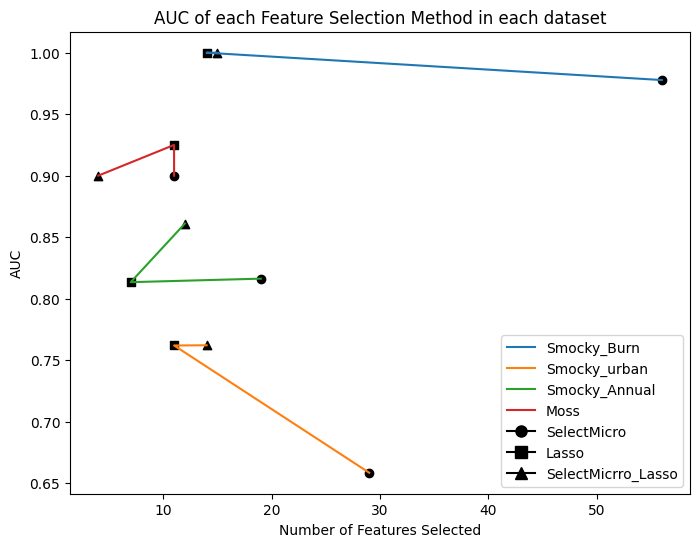

In [5]:
plotcompare(summary_data_RF,metric='AUC')

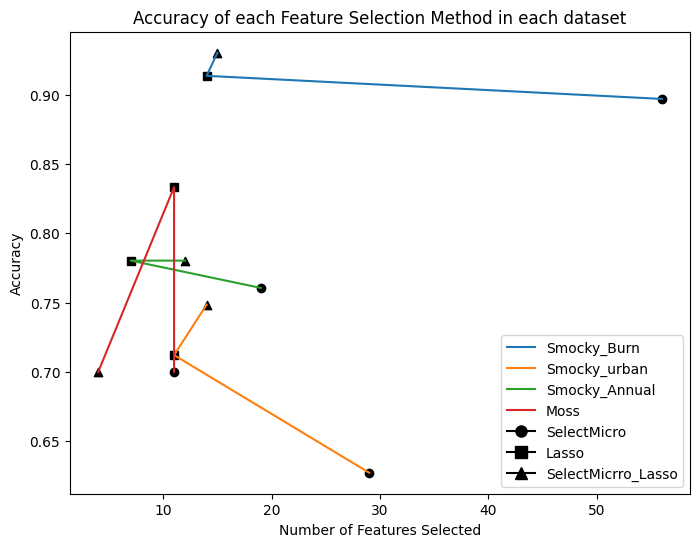

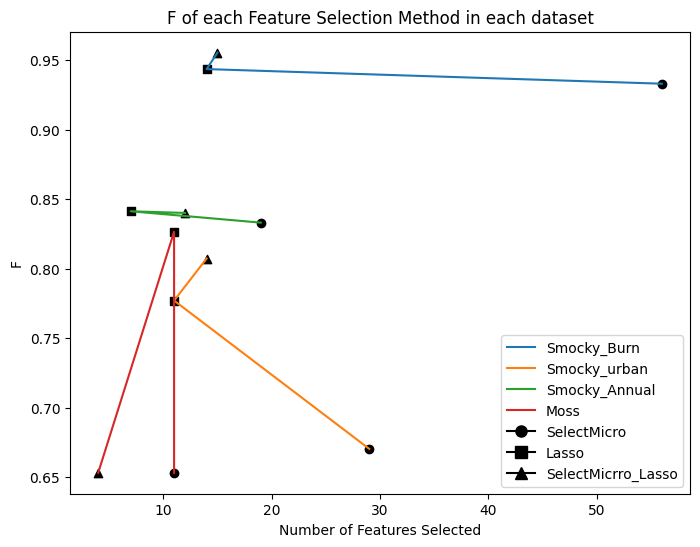

In [6]:
plotcompare(summary_data_RF)
plotcompare(summary_data_RF,metric='F')

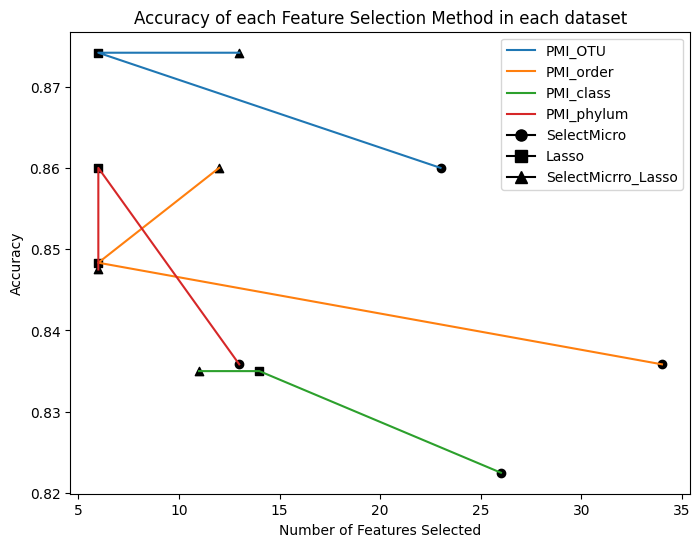

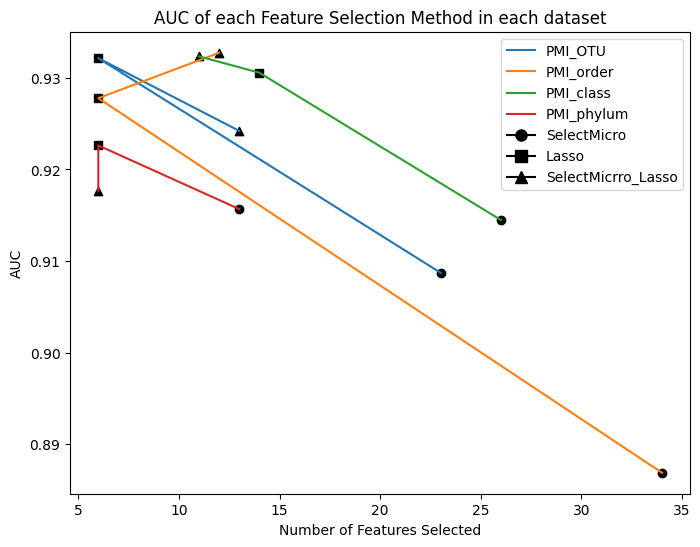

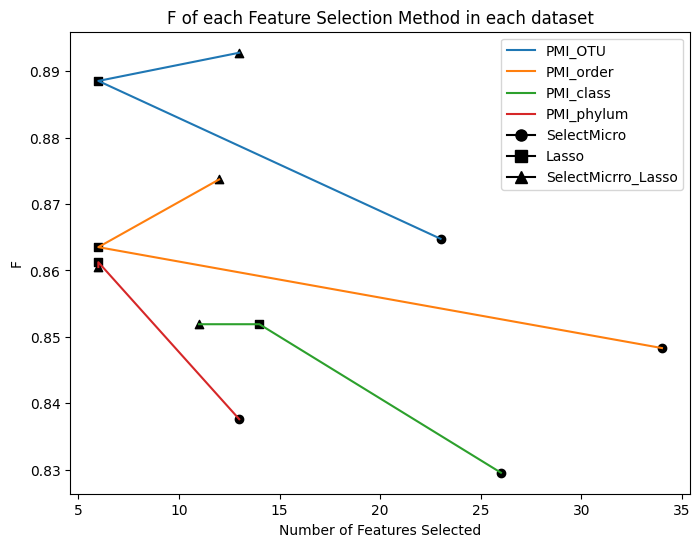

In [9]:
summary_RF_PMI = {'PMI_OTU':{'SelectMicro':[241,0.860000,0.908730,0.864762],
                              'Lasso':[9,0.874167,0.932143, 0.888538 ],
                              'SelectMicrro_Lasso':[9,	0.874167 ,0.924206,0.892787]},
                  
                  'PMI_order':{'SelectMicro':[110, 0.835833 ,0.886905,0.848300 ],
                              'Lasso':[23,0.848333,0.927778,0.863503],
                              'SelectMicrro_Lasso':[20,	0.860000,0.932738,0.873699]},
                  
                   'PMI_class':{'SelectMicro':[63,0.822500,0.914484,0.829524],
                              'Lasso':[19,0.835000,0.930556,0.851892],
                              'SelectMicrro_Lasso':[18,	0.835000,0.932341,0.851892]},
                   
                   'PMI_phylum':{'SelectMicro':[23,0.835833, 0.915675,0.837586 ],
                              'Lasso':[8, 0.860000,0.922619,0.861232  ],
                              'SelectMicrro_Lasso':[8,	0.847500,0.917659,0.860504]}
                 }
plotcompare(summary_RF_PMI)
plotcompare(summary_RF_PMI,metric='AUC')
plotcompare(summary_RF_PMI,metric='F')